In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
train_year = pd.read_csv("train.csv")
print('Shape of the train data:',train.shape)
print(train_year.head(10))

Shape of the train data: (913000, 4)
         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
5  2013-01-06      1     1     12
6  2013-01-07      1     1     10
7  2013-01-08      1     1      9
8  2013-01-09      1     1     12
9  2013-01-10      1     1      9


In [9]:
train_year['year']=train_year['date'].apply(lambda x: x[:4]).astype(int)
train_year['month']=train_year['date'].apply(lambda x: x[5:7]).astype(int)
train_year['day']=train_year['date'].apply(lambda x: x[8:10]).astype(int)

In [10]:
year_sales=train_year[['sales','year']].groupby('year').sum().reset_index()

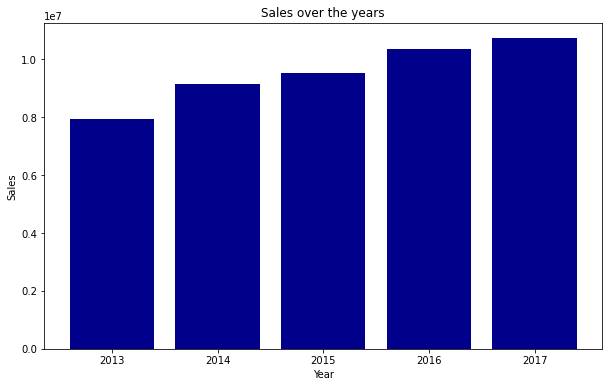

In [11]:
plt.figure(figsize=(10,6))
plt.bar(year_sales.year, year_sales.sales, data=year_sales, color='darkblue')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title('Sales over the years')
plt.show()

In [12]:
year_sales_mean=train_year[['sales','year']].groupby('year').mean().reset_index()

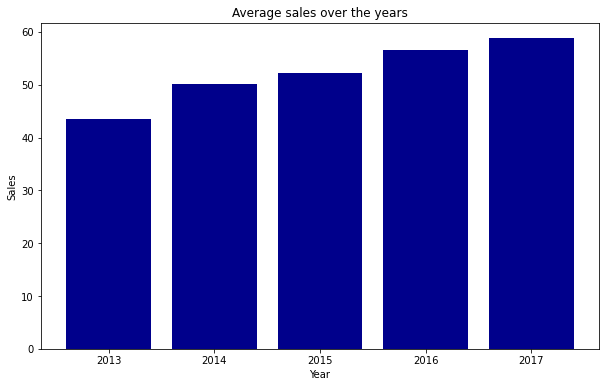

In [13]:
plt.figure(figsize=(10,6))
plt.bar(year_sales_mean.year, year_sales_mean.sales, data=year_sales_mean, color='darkblue')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title('Average sales over the years')
plt.show()

In [14]:
month_sales_mean=train_year[['sales','month']].groupby(['month']).mean().reset_index()

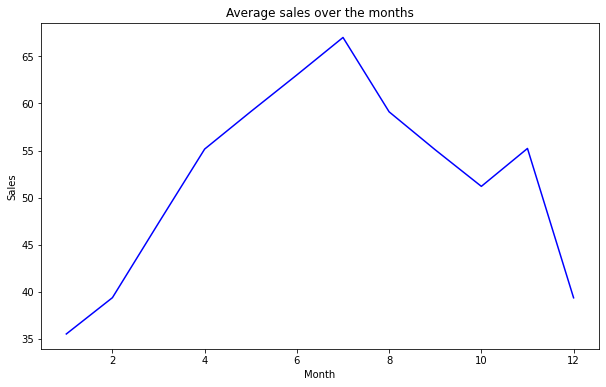

In [15]:
plt.figure(figsize=(10,6))
plt.plot(month_sales_mean.month,month_sales_mean.sales,  color='blue')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title('Average sales over the months')
plt.show()

C:\Users\Jordan Tan Rei Yao\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


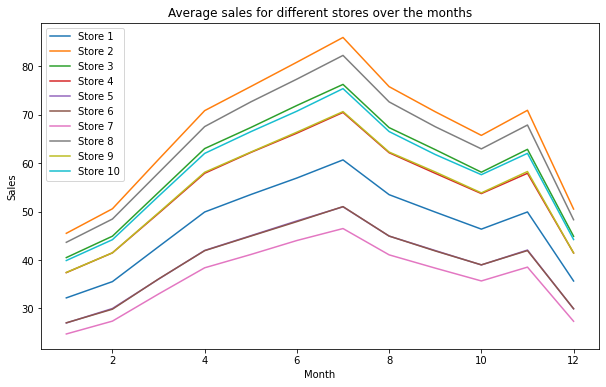

In [16]:
plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title('Average sales for different stores over the months')
ax = plt.subplot()

for i in train['store'].unique():
    data=train_year.loc[train_year['store']==i][['sales','month']].groupby('month').mean().reset_index()
    ax.plot(data.month,data.sales,label='Store {}'.format(i))
ax.legend()    
plt.show()  

In [17]:
total_item_sales=train_year[['item','sales']].groupby(['item']).mean().sort_values('sales',ascending=False).reset_index().head(10)

In [18]:
total_item_sales

,item,sales
0,15,88.030778
1,28,87.881325
2,13,84.316594
3,18,84.275794
4,25,80.686418
5,45,80.584173
6,38,80.521906
7,22,80.502245
8,36,77.028916
9,8,76.950055
